In [1]:
import torch
import numpy as np
import glob

In [5]:
import os
import matplotlib.pyplot as plt

In [181]:
path = "/home/kushashwa/Pictures/"
files = glob.glob(os.path.join(path, '[k | K]*[.jpg | .png]'))

In [182]:
files[3] # 4th image is kush_contours.png

'/home/kushashwa/Pictures/kush_contours.png'

In [183]:
shuffle = np.random.permutation(files)

In [184]:
# clearly sixth image is kush_contours.png now.
shuffle[5]

'/home/kushashwa/Pictures/Krutika.png'

In [185]:
for t in shuffle[5:6]:
    folder = t.split('/')[-1].split('.')[0]
    print(t, folder)

/home/kushashwa/Pictures/Krutika.png Krutika


## PyTorch Pre-processing Image Datasets

1. Resize all the images to the same size. Most of the deep learning architectures
expect the images to be of the same size.
2. Normalize the dataset with the mean and standard deviation of the dataset.
3. Convert the image dataset to a PyTorch tensor.

In [3]:
from torchvision.datasets import ImageFolder

In [4]:
from torchvision import transforms

In [213]:
simple_transform = transforms.Compose([transforms.Scale((7, 7)), 
                   transforms.ToTensor(),
                   transforms.Normalize([0.485, 0.456,
                                        0.406], [0.229, \
                                                0.224, 0.225])])
train = ImageFolder('dogsandcats/', simple_transform)
valid = ImageFolder('dogsandcats/', simple_transform)

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [214]:
train

Dataset ImageFolder
    Number of datapoints: 37500
    Root Location: dogsandcats/
    Transforms (if any): Compose(
                             Scale(size=(7, 7), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [215]:
valid

Dataset ImageFolder
    Number of datapoints: 37500
    Root Location: dogsandcats/
    Transforms (if any): Compose(
                             Scale(size=(7, 7), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [216]:
train.class_to_idx

{'train': 0, 'valid': 1}

In [217]:
train.classes

['train', 'valid']

## Visualizing the Tensors

In [193]:
def imshow(inpTensor):
    '''
    visualizes tensor
    '''
    inp = inpTensor.numpy().transpose((1, 2, 0))
    print(inp.shape)
    plt.imshow(inp)
    plt.show()
    print("After Normalizing")
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std*inp + mean
    # no need to clip, already normalized to (0, 1)
    # inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

<center><code>np.clip()</code></center>

<center>**Source:** https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.clip.html</center>

Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.



In [194]:
sampleTensor = np.array([0.24, 200, 230, -10, 140])

In [195]:
sampleTensor = np.clip(sampleTensor, 0, 2)
sampleTensor

array([0.24, 2.  , 2.  , 0.  , 2.  ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(7, 7, 3)


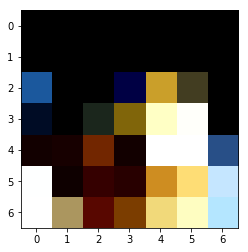

After Normalizing


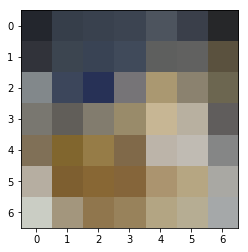

In [218]:
imshow(train[250][0])

In [233]:
train_data_gen = torch.utils.data.DataLoader(train, batch_size = 64, num_workers = 3)
valid_data_gen = torch.utils.data.DataLoader(valid, batch_size = 64, num_workers = 3)

In [220]:
train_data_gen.dataset

Dataset ImageFolder
    Number of datapoints: 37500
    Root Location: dogsandcats/
    Transforms (if any): Compose(
                             Scale(size=(7, 7), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [221]:
valid_data_gen.dataset

Dataset ImageFolder
    Number of datapoints: 37500
    Root Location: dogsandcats/
    Transforms (if any): Compose(
                             Scale(size=(7, 7), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

`DataLoader` class has 2 main methods (used mostly):

1. `shuffle`: Shuffle the images on the dataset called.
2. `num_workers`: For parallelization. Use number of workers < number of workers less than your machine

In [222]:
import torchvision.models as models
import torch.nn as nn

In [223]:
model_fit = models.resnet18(pretrained=True)

In [224]:
num_features = model_fit.fc.in_features

In [225]:
num_features

512

In [240]:
model_fit.fc.in_features = num_features
model_fit.fc.out_features = 2

In [241]:
print(model_fit)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

## Training

In [6]:
import torch.optim as optim
import time

In [229]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_fit.parameters(), lr = learning_rate, momentum = 0.9)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size = 7, gamma = 0.1)

In [7]:
from torch.autograd import Variable

In [242]:
# let's define a train_model function
# tunes the weights (pre-trained weights)
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    dataloaders = {'train': train_data_gen, 'valid': valid_data_gen}
    dataset_sizes = {'train': len(train_data_gen.dataset), 'valid': len(valid_data_gen.dataset)}
    start = time.time()
    # Returns a dictionary containing a whole state of the module.
    # in the format ['weights', 'bias']
    model_weights_bias = model.state_dict()
    acc = 0.0 # starting accuracy
    
    for epoch in range(num_epochs):
        print('Epoch: {}/{}'.format(epoch, num_epochs-1))
        print('-' * 10)
        
        for phase in ['train', 'valid']:
            if phase == 'train':
                # train when phase is training
                scheduler.step()
                model.train(True) # training mode
            else:
                # don't train when validation is going on
                model.train(False) # evaluating mode
            
            running_loss = 0.0
            running_corrects = 0.0
            
            for data in dataloaders[phase]:
                inputs, labels = data
                
                print(inputs.shape)
                inputs, labels = Variable(inputs), Variable(labels) # not needed anymore
                
                optimizer.zero_grad()
                
                outputs = model(inputs)
                
                _, preds = torch.max(outputs.data, 1)
                
                loss = criterion(outputs, labels)
                
                if phase == 'train':
                    loss.backward()
                    optimizer.step()
                
                running_loss += loss.data[0]
                running_corrects += torch.sum(preds == labels.data)
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            if phase == 'valid' and epoch_acc > acc:
                acc = epoch_acc
                model_weights_bias = model.state_dict()
        
        end = time.time()
        print("Time taken: ", end-start)
        model.load_state_dict(model_weights_bias)
        return model

In [243]:
train_model(model_fit, criterion, optimizer_ft, exp_lr_scheduler)

Epoch: 0/24
----------
torch.Size([64, 3, 7, 7])


RuntimeError: Given input size: (512x1x1). Calculated output size: (512x-5x-5). Output size is too small at /pytorch/aten/src/THNN/generic/SpatialAveragePooling.c:64

## Training a Deep NN

    1. Train the algorithm on the training dataset.
    2. Perform Hyperparameter turning using validation dataset.
    3. Perform fist 2 steps, iteratively until fixed number of epochs, or loss has reached to certain point.
    4. Evaluate on test dataset.

## Types of Splitting Methods

    1. Simple holdout validation
    2. K-fold validation
    3. Iterative K-fold validation

## Evaluation Protocol

There are three possible ways of evaluating our progress:

    1. Holdout Validation Set
        * When you have enough data 
    2. K-fold Cross Validation
    3. Iterated k-fold Validation

